<a href="https://colab.research.google.com/github/ankit-verma2000/Portfolio-Repo/blob/main/Cty_supply_%26_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

- **Date:** Date of booking
- **Time(Local):** Time in hour(16 means 4 PM)
- **Eyeballs:** Number of people opened the app.
- **Zeros:** Number of people not able to saw any availabe cars.
- **Requests:** Number of people requested for the car.
- **Completed Trips:** Number of completed records.
- **Unique Drivers:** Number of availabe drivers who opened the app or logged in  .
-


In [5]:
df = pd.read_csv('/content/uber_supply_demand.csv')
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


In [6]:
print(f'Number of rows: {df.shape[0]} & number of features: {df.shape[1]} ')
print()
print(df.info())
print()
print(df.describe())

Number of rows: 336 & number of features: 7 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              15 non-null     object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB
None

       Time (Local)   Eyeballs      Zeroes   Completed Trips    Requests   \
count     336.00000  336.000000  336.000000        336.000000  336.000000   
mean       11.50000   19.901786    4.252976          4.062500    5.529762   
std         6.93251   16.902862    5.795391          5.672581    7.399416   
min         0.00000    0.000000    0.000000          0.000000    0.0000

In [7]:
# Check for null values:
df.isnull().sum()
# check for duplicated data:
print('Duplicated rows:', df.duplicated().sum())

Duplicated rows: 10


In [8]:
# Handling the missing column(date):
df['Date'].ffill(axis = 0, inplace = True)

In [9]:
# data sanity:
print('Numer of missing data (after handling):\n', df.isna().sum())
print()
print('Numer of Duplciated data (after handling):\n', df.duplicated().sum())

Numer of missing data (after handling):
 Date                0
Time (Local)        0
Eyeballs            0
Zeroes              0
Completed Trips     0
Requests            0
Unique Drivers      0
dtype: int64

Numer of Duplciated data (after handling):
 0


In [10]:
df.columns = ['Date', 'Time', 'Eyeballs', 'Zeroes', 'Completed_Trips','Requests', 'UniqueDrivers']

In [11]:
df.columns

Index(['Date', 'Time', 'Eyeballs', 'Zeroes', 'Completed_Trips', 'Requests',
       'UniqueDrivers'],
      dtype='object')

## Q1. Which date had the most completed trips during the two week periods?

In [12]:
df.head()

,Date,Time,Eyeballs,Zeroes,Completed_Trips,Requests,UniqueDrivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11


In [13]:
df.groupby('Date').agg(Total_completed_trips = ('Completed_Trips', 'sum')).sort_values(by = 'Total_completed_trips', ascending = False).head(1)

,Total_completed_trips
Date,
22-Sep-12,248


## Q2. What was the higest number of completed trips within a 24 hour period?

In [14]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'].astype(str) + ':00:00')
df.set_index('Datetime', inplace = True)
df.head()


,Date,Time,Eyeballs,Zeroes,Completed_Trips,Requests,UniqueDrivers
Datetime,,,,,,,
2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9
2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14
2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14
2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14
2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11


In [15]:
df_rolling_sum = df['Completed_Trips'].rolling(window = '24H').sum().shift(-23)
df_rolling_sum.sort_values(ascending = False).head()

,Completed_Trips
Datetime,
2012-09-21 17:00:00,278.0
2012-09-21 16:00:00,274.0
2012-09-21 20:00:00,261.0
2012-09-22 04:00:00,260.0
2012-09-22 08:00:00,260.0


## Q3. Which hour of the day had the most requests during the 2 week period?

In [16]:
df.groupby('Time').agg(Total_Requests = ('Requests', 'sum')).sort_values(by = 'Total_Requests', ascending = False).head(1)

,Total_Requests
Time,
23,184


## Q4. What percentage of all zeros during the 2 week period occured on weekend(friday 5 Pm to sunday at 3Am)?

In [17]:
df.head(1)

,Date,Time,Eyeballs,Zeroes,Completed_Trips,Requests,UniqueDrivers
Datetime,,,,,,,
2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9


In [18]:
df.reset_index(inplace= True)
df['Day_of_week']= df['Datetime'].dt.day_name()

In [19]:
df.head()

,Datetime,Date,Time,Eyeballs,Zeroes,Completed_Trips,Requests,UniqueDrivers,Day_of_week
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday


In [20]:
num = df[(df['Day_of_week'] == 'Friday') & (df['Time'] >= 15) | (df['Day_of_week'] == 'Saturday') | ((df['Day_of_week'] == 'Sunday') & (df['Time'] <= 3))]['Zeroes'].sum()
print(num)

659


In [21]:
denom = df['Zeroes'].sum()
print(denom)

pct = round(num/ denom * 100,2)
print('Percentage of all Zeroes: ', pct)

1429
Percentage of all Zeroes:  46.12


## Q5. What is the weighted average ratio of completed trips per driver during the 2 week period?

In [22]:
df.columns

Index(['Datetime', 'Date', 'Time', 'Eyeballs', 'Zeroes', 'Completed_Trips',
       'Requests', 'UniqueDrivers', 'Day_of_week'],
      dtype='object')

In [23]:
df_drivers = df[df['UniqueDrivers']> 0]
df_drivers['ratios'] = df_drivers['Completed_Trips']/ df['UniqueDrivers']
df_drivers.head()

,Datetime,Date,Time,Eyeballs,Zeroes,Completed_Trips,Requests,UniqueDrivers,Day_of_week,ratios
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday,0.222222
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday,0.142857
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday,0.000000
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday,0.000000
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday,0.363636


In [24]:
# Normal average ratios:
np.average(df_drivers['ratios'])


np.float64(0.4743397876937869)

In [25]:
num = sum(df_drivers['ratios'] * df_drivers['Completed_Trips'])
deno = sum(df_drivers['Completed_Trips'])
print('weighted average ratio: ', num/deno)

weighted average ratio:  0.8282775715092396


## Q6.IN drafting a driver schedule in terms of 8 hour shifts, when are the busiest8 consecutive hours over the 2 weeks period in terms of unique requests? **A new shifts starts in every 8 hours. Assume that a driver will work same shift each day.**

In [26]:
df.set_index('Datetime', inplace = True)
df_rolling_sum = df['Requests'].rolling('8H').sum().shift(-7)
df_rolling_sum.head()

,Requests
Datetime,
2012-09-10 07:00:00,11.0
2012-09-10 08:00:00,11.0
2012-09-10 09:00:00,13.0
2012-09-10 10:00:00,17.0
2012-09-10 11:00:00,20.0


In [27]:
df_rolling_sum.sort_values(ascending = False).head(5)

,Requests
Datetime,
2012-09-22 19:00:00,207.0
2012-09-21 17:00:00,207.0
2012-09-21 18:00:00,205.0
2012-09-22 18:00:00,202.0
2012-09-21 19:00:00,201.0


## Q7. True or False: Drivers supply always increases when demand increcreases during the 2 week period.

In [28]:
df.reset_index(inplace = True)

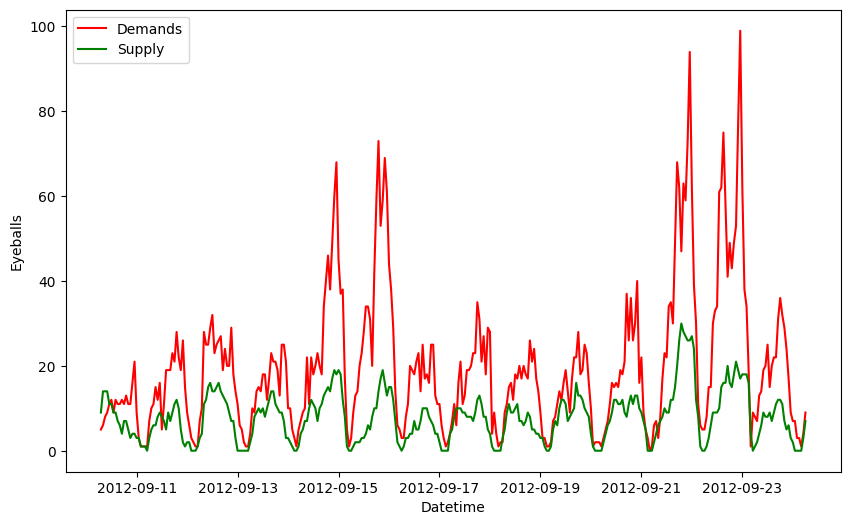

In [29]:
plt.figure(figsize = (10,6))
sns.lineplot(data = df, x = 'Datetime', y = 'Eyeballs', label = 'Demands', color = 'red')
sns.lineplot(data = df, x = 'Datetime', y = 'UniqueDrivers', label = 'Supply', color = 'green')
plt.show()

**So by looking at the starting of the plot, we can observe that as Demands increases supply there was decreasesing. So, the statement is false.(Generally it does but not always)**

## Q8. In which 72 hour period is the ratio of zeros to eyeballs the highest?

In [30]:
df.set_index('Datetime', inplace = True)
df_rolling_sum = df['Zeroes'].rolling('72H').sum().shift(-71) / df['Eyeballs'].rolling('72H').sum().shift(-71)
df_rolling_sum.head()

,0
Datetime,
2012-09-10 07:00:00,0.179916
2012-09-10 08:00:00,0.180021
2012-09-10 09:00:00,0.180498
2012-09-10 10:00:00,0.180412
2012-09-10 11:00:00,0.180328


In [31]:
df_rolling_sum.sort_values(ascending = False).head()

,0
Datetime,
2012-09-15 05:00:00,0.292977
2012-09-15 04:00:00,0.292195
2012-09-15 06:00:00,0.292112
2012-09-15 07:00:00,0.290301
2012-09-15 03:00:00,0.288360


## Q9. If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?

In [32]:
df.reset_index(inplace=True)

In [33]:
eye_vs_dri = df.groupby('Time').agg(Total_eyeballs = ('Eyeballs', 'sum'), Total_drivers = ('UniqueDrivers', 'sum')).reset_index()
eye_vs_dri['ratio'] = eye_vs_dri['Total_drivers']/ eye_vs_dri['Total_eyeballs']
eye_vs_dri.head()

,Time,Total_eyeballs,Total_drivers,ratio
0,0,339,111,0.327434
1,1,207,94,0.454106
2,2,170,62,0.364706
3,3,83,40,0.481928
4,4,29,9,0.310345


In [34]:
eye_vs_dri.sort_values(by = 'ratio', ascending = True).head()

,Time,Total_eyeballs,Total_drivers,ratio
23,23,488,119,0.243852
5,5,42,11,0.261905
22,22,492,144,0.292683
4,4,29,9,0.310345
0,0,339,111,0.327434


## Q10. True or False: There is exactly two weeks of data in this analysis.

In [35]:
df['Datetime'].min(), df['Datetime'].max()

(Timestamp('2012-09-10 07:00:00'), Timestamp('2012-09-24 06:00:00'))

## Q11. Looking at the data from all 2 weeks , which time might make the most sense to consider a true 'end day' insetead of midnight? (i.e when are suppy and demad at both their natural minimums)

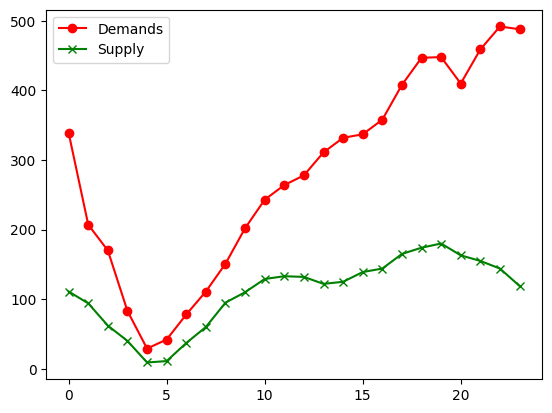

In [36]:
from matplotlib import markers
minimum = df.groupby('Time').agg(Total_eyeballs = ('Eyeballs', 'sum'), Total_drivers = ('UniqueDrivers', 'sum')).reset_index()
plt.plot(minimum['Time'], minimum['Total_eyeballs'], color = 'red', label = 'Demands', marker = 'o')
plt.plot(minimum['Time'], minimum['Total_drivers'], color = 'green', label = 'Supply', marker = 'x')
plt.legend()
plt.show()

In [40]:
import matplotlib.dates as mdates

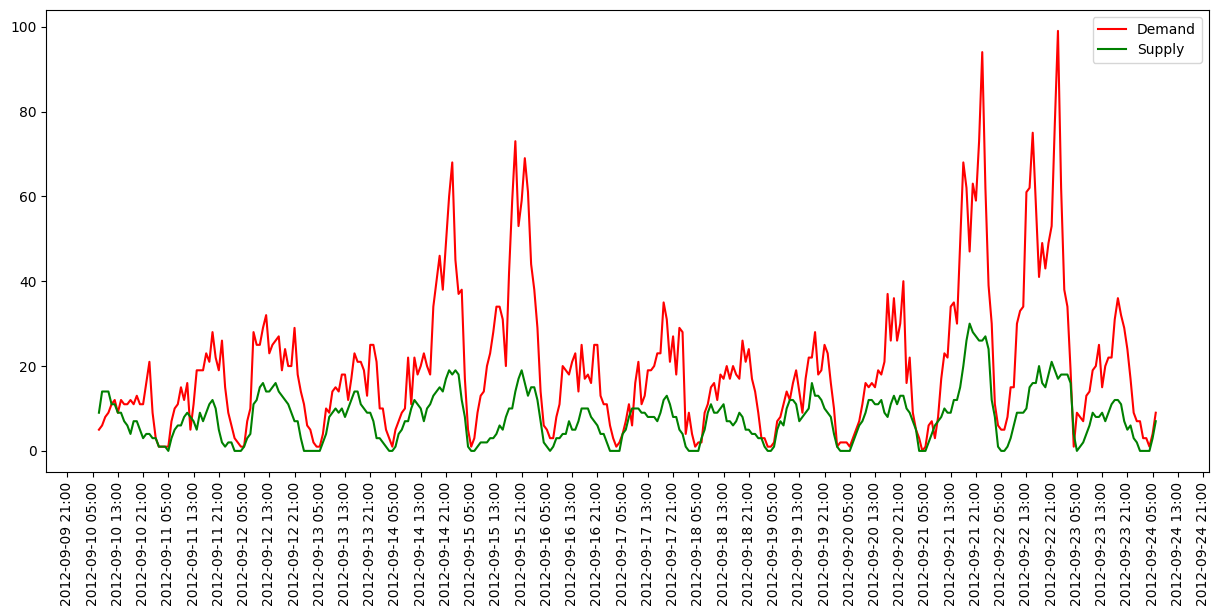

In [45]:
plt.figure(figsize = (15,6))
plt.plot(df['Datetime'], df['Eyeballs'], color = 'red', label = 'Demand')
plt.plot(df['Datetime'], df['UniqueDrivers'], color = 'Green', label = 'Supply')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval = 8))
plt.legend()
plt.xticks(rotation = 90)
plt.show()